In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
import os

In [5]:
audios = glob('/content/drive/MyDrive/audios_1/*/*.wav')

In [7]:
ipd.Audio(audios[2])

In [8]:
y,sr= librosa.load(audios[2])

In [9]:
y

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7627033e-05,
       5.2946275e-06, 2.7606171e-05], dtype=float32)

In [10]:
sr

22050

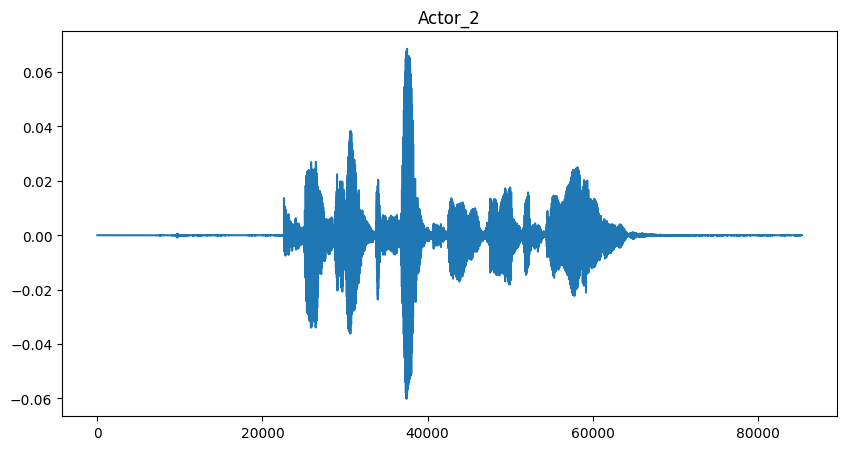

In [14]:
pd.Series(y).plot(figsize=(10,5),
                  title='Actor_2')
plt.show()

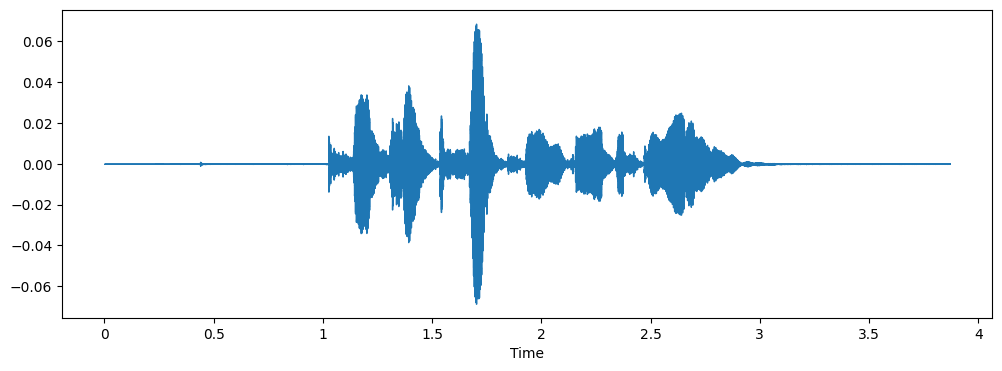

In [17]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(y,sr=sr)
plt.show()

In [23]:
chroma= librosa.feature.chroma_stft(y=y,sr=sr)

In [24]:
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

In [25]:
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

In [30]:
new_sr = 8000
new_audio = librosa.resample(y, orig_sr=sr, target_sr=new_sr)

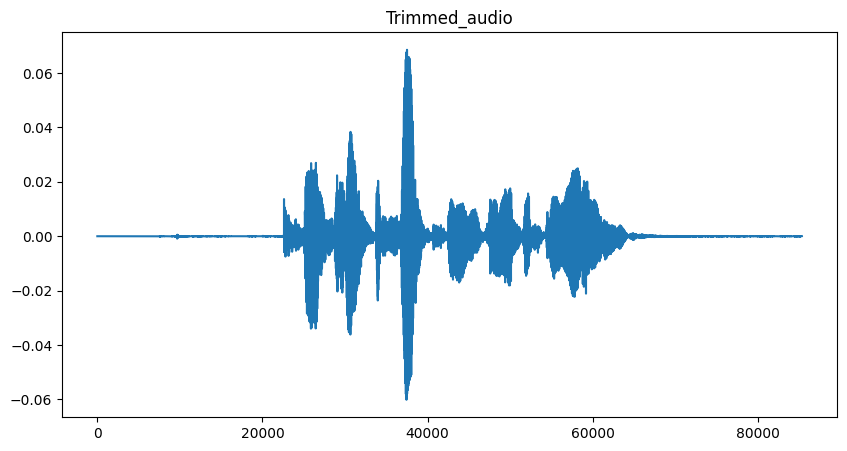

In [39]:
new_audi0 = librosa.effects.trim(y, top_db=5)
pd.Series(y).plot(figsize=(10,5),
                  title='Trimmed_audio')
plt.show()

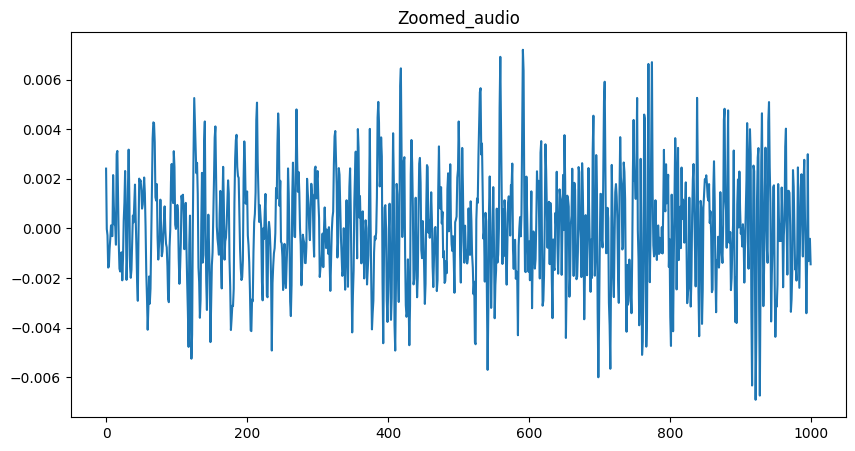

In [41]:
pd.Series(y[35000:36000]).plot(figsize=(10,5),
                  title='Zoomed_audio')
plt.show()

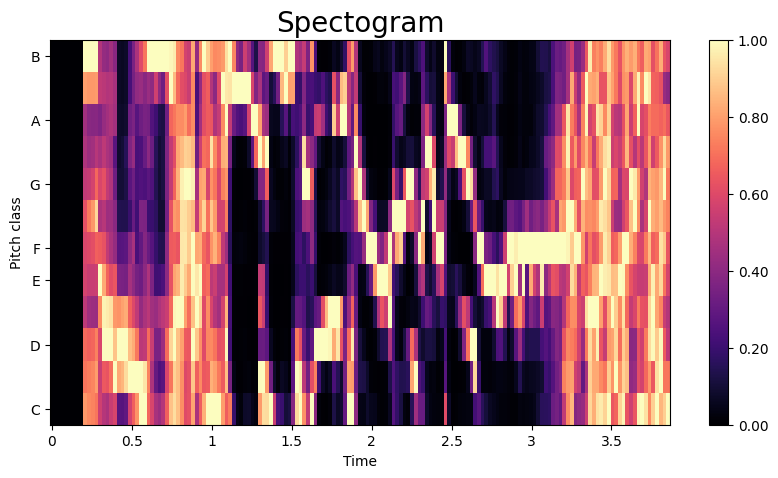

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
img= librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set_title('Spectogram', fontsize= 20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [61]:
y1, sr1 = librosa.load(audios[0], sr=sr1)
y2, sr2 = librosa.load(audios[1], sr=sr1)
y3, sr3 = librosa.load(audios[2], sr=sr1)

max_len = max(len(y1), len(y2), len(y3))
y1 = np.pad(y1, (0, max_len - len(y1)), 'constant')
y2 = np.pad(y2, (0, max_len - len(y2)), 'constant')
y3 = np.pad(y3, (0, max_len - len(y3)), 'constant')

new_audio = librosa.util.stack([y1,y2,y3])
ipd.Audio(new_audio, rate=sr1)

In [67]:
new_audio.shape

(3, 185785)

In [78]:
new_audio1 = librosa.effects.pitch_shift(y, sr=sr, n_steps=5)
ipd.Audio(new_audio1, rate=sr)

In [79]:
new_audio2 = librosa.effects.time_stretch(y, rate=0.5)
ipd.Audio(new_audio2, rate=sr)

In [84]:
def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)

    return (sig, sr)

In [86]:
@staticmethod
def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

In [87]:
@staticmethod
def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

In [92]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128*2)
S.shape

(256, 167)

In [93]:
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
S_db_mel.shape

(256, 167)

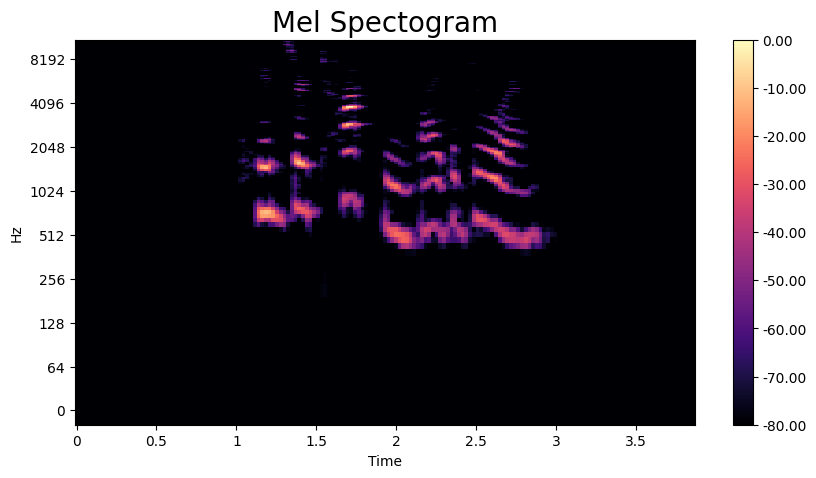

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
img= librosa.display.specshow(S_db_mel,
                              y_axis='log',
                              x_axis='time', ax=ax)
ax.set_title('Mel Spectogram', fontsize= 20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()